Loading EfficientNetB0 Model

In [23]:
import tensorflow as tf
file_model = tf.keras.models.load_model('EfficientNetB0-Model-V4.keras')


In [12]:
import joblib
joblib.dump(file_model, 'Model_EfficientNetB0_Test.pb')

['Model_EfficientNetB0_Test.pb']

In [17]:
file_model.save('Model_EfficientNetB0_Test.h5')

TypeError: cannot pickle 'module' object

In [14]:
file_model = joblib.load('Model_EfficientNetB0_Test.pb')

Model Summary

In [18]:
file_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │        21,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,064,476 (61.28 MB)

 Trainable params: 5,340,817 (20.37 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 10,681,636 (40.75 MB)

Calling the Test Dataset folder

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 224
test_folder = "D:/Thesis Related Stuff/Dataset-test"


test_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode = None,
    color_mode = 'rgb'
)

Found 2554 images belonging to 21 classes.


Evaluating the Model's Accuracy from the Test Dataset

In [21]:
loss, acc = file_model.evaluate_generator(test_generator)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

AttributeError: 'Sequential' object has no attribute 'evaluate_generator'

Obtaining the Precision, Accuracy, and F1-Score of every classes using Classification Report Class from Scikit

In [15]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import os

imageFolder = "D:/Thesis Related Stuff/FINAL FOLDER"
CLASSES = os.listdir(imageFolder)
num_classes = len(CLASSES)

Y_pred = file_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

report = classification_report(test_generator.classes, y_pred, target_names=CLASSES)
print(report)
# final_report = pd.DataFrame(report).transpose()
# print(final_report)

320/320 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step
                                precision    recall  f1-score   support

    Cassava___Bacterial_Blight       0.00      0.00      0.00       124
          Cassava___Brown_Spot       0.00      0.00      0.00       104
Cassava___Brown_Streak_Disease       0.00      0.00      0.00       142
             Cassava___Damaged       0.00      0.00      0.00       120
             Cassava___Healthy       0.00      0.00      0.00       120
      Cassava___Mosaic_Disease       0.00      0.00      0.00       135
               Cassava___Pests       0.00      0.00      0.00       140
      Purple_Yam___Anthracnose       0.00      0.00      0.00       120
          Purple_Yam___Damaged       0.00      0.00      0.00       112
          Purple_Yam___Healthy       0.00      0.00      0.00       125
        Sweet_Potato___Damaged       0.00      0.00      0.00       100
  Sweet_Potato___Fusarium_Wilt       0.00      0.00      0.00       114
        Sweet_Potato_

C:\Users\SenpaiChris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SenpaiChris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SenpaiChris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\met

Obtaining the Confusion Matrix

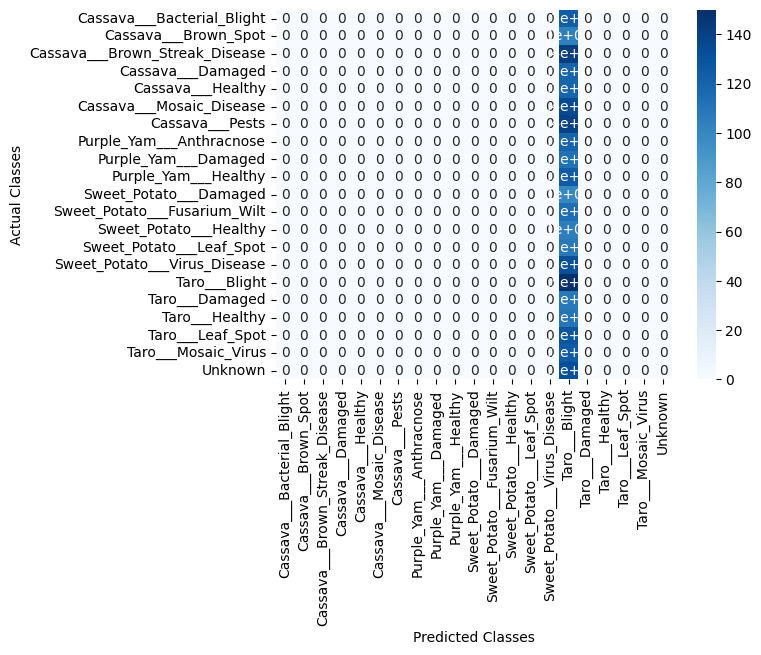

In [22]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = metrics.confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(confusion_matrix, cmap='Blues', annot=True, )
plt.xticks(np.arange(num_classes)+0.5, CLASSES, rotation=90)
plt.yticks(np.arange(num_classes)+0.5, CLASSES, rotation=0)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()